(100,)
(100,)


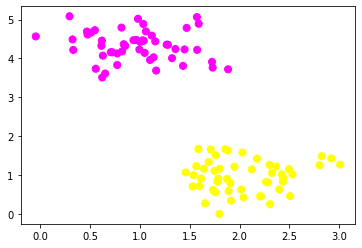

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.40)
print(y.shape)
print(y.shape)

# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.show()


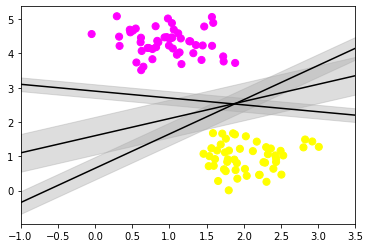

In [ ]:
# creating linspace between -1 to 3.5
xfit = np.linspace(-1, 3.5)
# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')


# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
    color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()

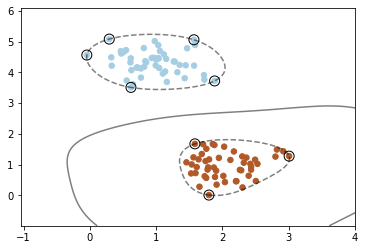

In [ ]:
# fit the model, don't regularize for illustration purposes
# clf = svm.SVC(kernel="linear", C=1000)
# clf.fit(X, y)


C = 1.0  # SVM regularization parameter
### SVC with linear kernel
# clf = svm.SVC(kernel='linear', C=C).fit(X, y)

###LinearSVC (linear kernel)
# clf= svm.LinearSVC(C=C).fit(X, y)

###SVC with RBF kernel
clf= svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

###SVC with polynomial (degree 3) kernel
# clf= svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)



plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()


In [ ]:
from sklearn import metrics
y_predict = clf.predict(X)
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(Y, y_predict))